## Exploratory Data Analysis(EDA) - Credit Risk Model

### **Objective:** Explore the Xente dataset to uncover patterns, data quality issues and form hypotheses for the Credit Risk Proxy variable.

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set plot style
sns.set_style("whitegrid")

## Load data

In [2]:
DATA_PATH = '../data/raw/data.csv'

# Load data
try:
    df = pd.read_csv(DATA_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {DATA_PATH}. Please check the path.")

Data loaded successfully.


## Overview of the data

In [3]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 95662, Columns: 16


In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Preview the first few rows
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Summary Statistics

In [6]:
# Numerical statistics
display(df.describe())

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
# Object (Categorical) statistics
display(df.describe(include=['object']))

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


### Insight on 'Amount' vs 'Value'
*   **Amount:** Can be positive or negative. The prompt states: "Positive for debits from customer (Purchase), Negative for credits into customer (Refund/Payout)."
*   **Value:** Absolute value.

*Check:* Are there unique currencies?

In [8]:
print("Unique Currencies:", df['CurrencyCode'].unique())
print("Unique Countries:", df['CountryCode'].unique())

Unique Currencies: ['UGX']
Unique Countries: [256]


## Distribution of Numerical Features

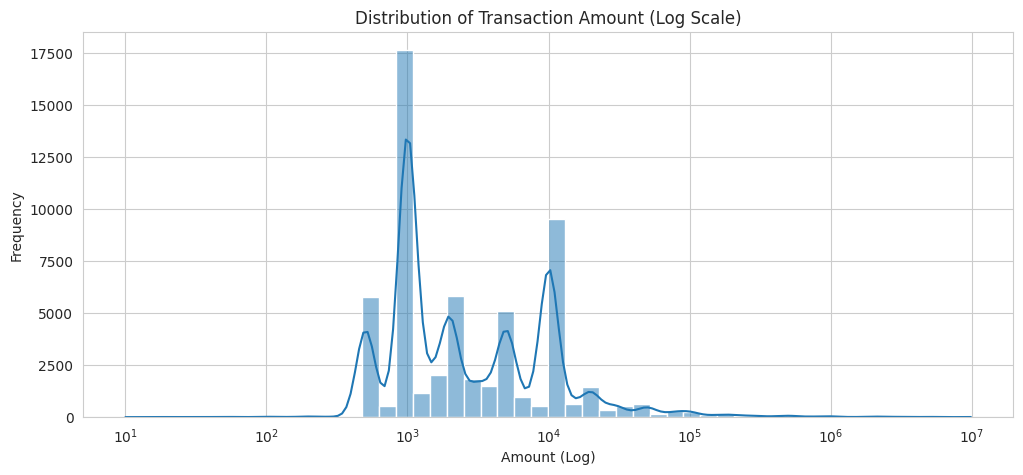

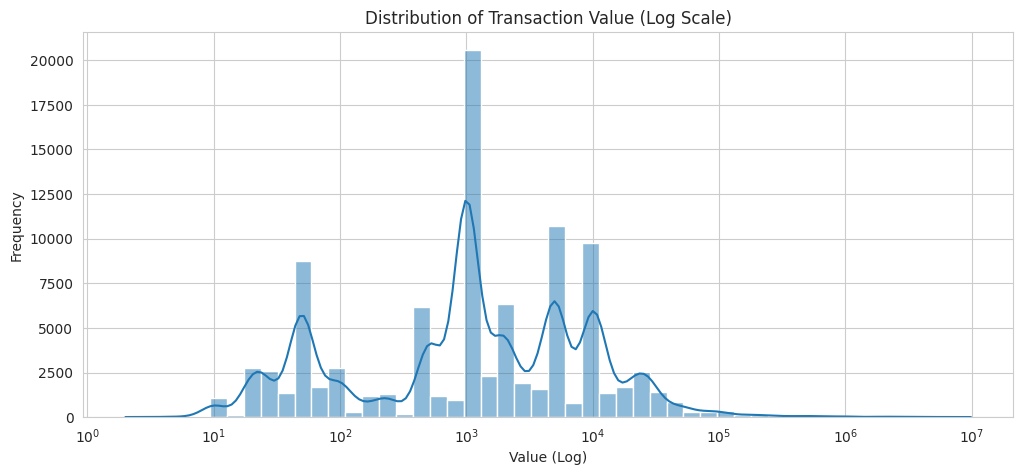

In [16]:
num_cols = ['Amount', 'Value']

# Histogram for 'Value' (Transaction Magnitude)
for col in num_cols:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[col], bins=50, kde=True, log_scale=True) 
    plt.title(f"Distribution of Transaction {col} (Log Scale)")
    plt.xlabel(f'{col} (Log)')
    plt.ylabel('Frequency')
    plt.show()

## Distribution of Categorical Features

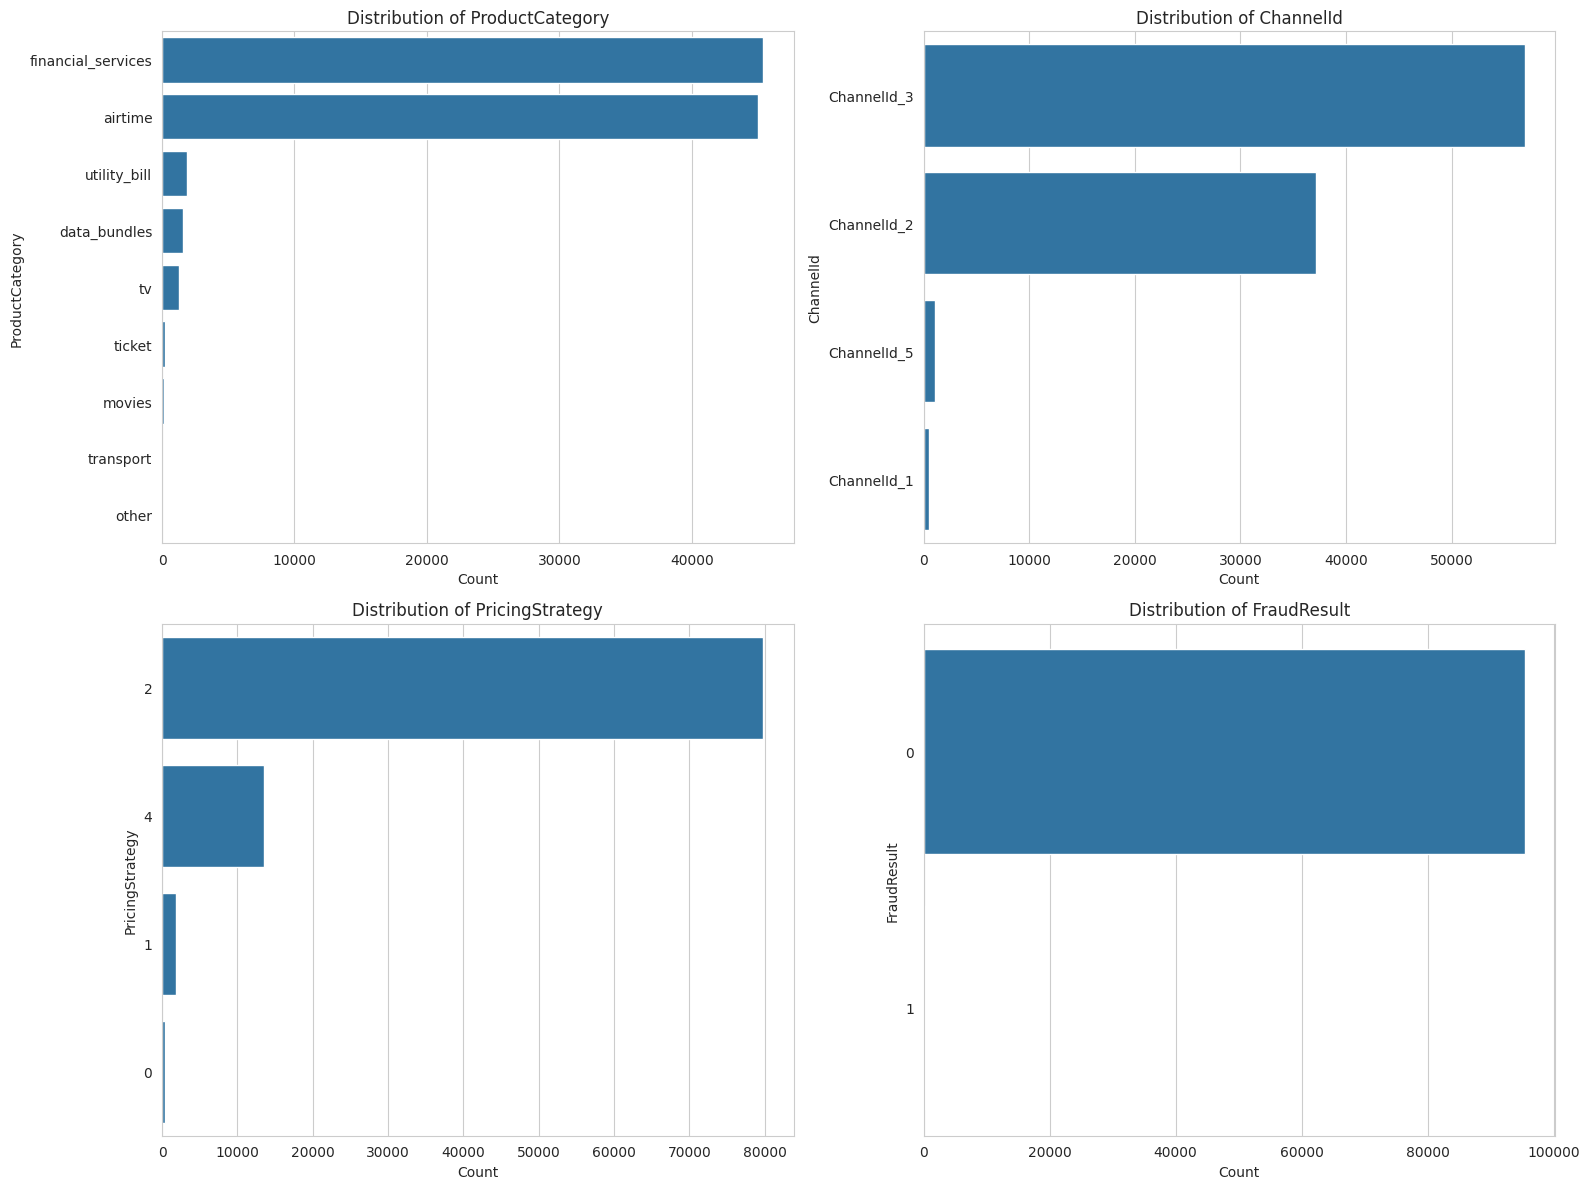

In [13]:
# List of categorical columns to analyze
cat_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(cat_cols):
    row, col_idx = divmod(i, 2)
    sns.countplot(y=df[col], ax=axes[row, col_idx], order=df[col].value_counts().index)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel('Count')

plt.tight_layout()
plt.show()


## Correlation Analysis

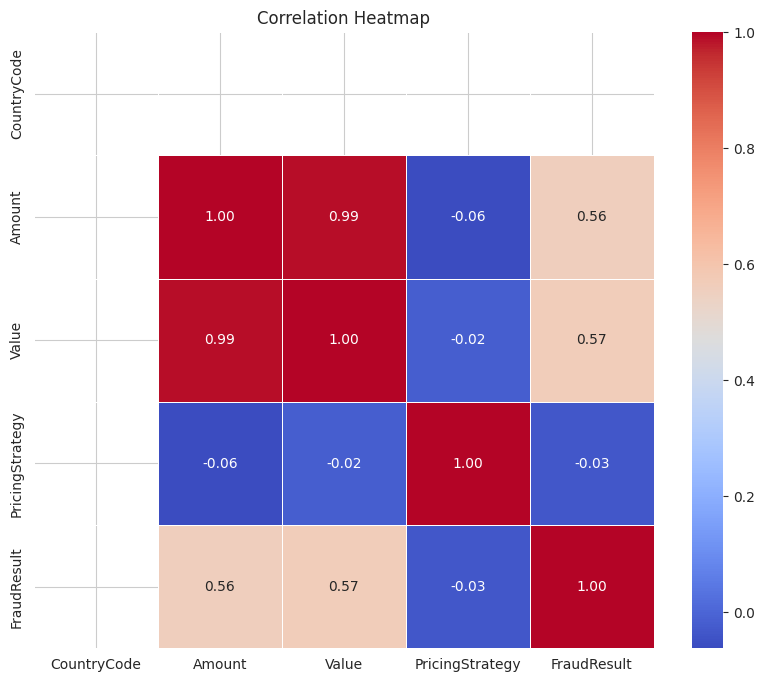

In [17]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Identifying Missing Values

In [18]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)

display(missing_df)

,Missing Count,Percentage


## Outlier Detection

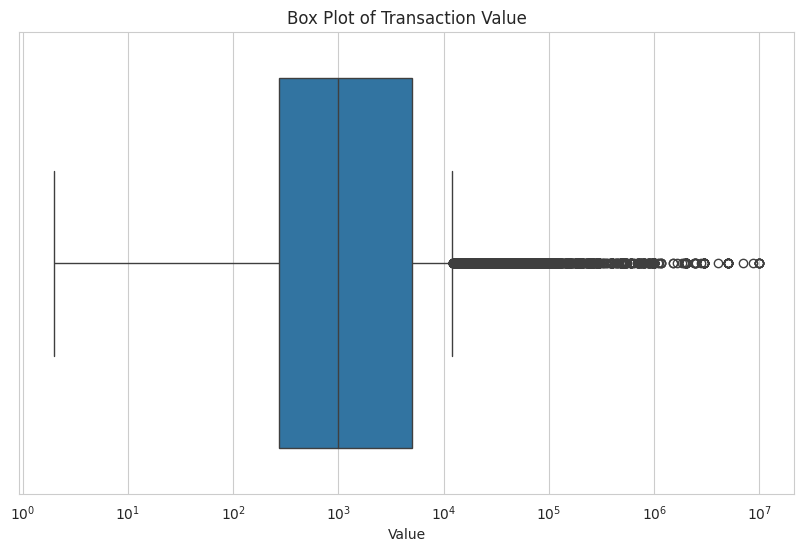

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Transaction Value')
plt.xscale('log') # Log scale helps view the spread better
plt.show()

In [20]:
# Check the top 10 largest transactions
print("Top 10 High Value Transactions:")
display(df.sort_values(by='Value', ascending=False).head(10))

Top 10 High Value Transactions:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
87487,TransactionId_31461,BatchId_56005,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9880000.0,9880000,2019-02-07T03:45:05Z,2,1
87465,TransactionId_27985,BatchId_15818,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9870000.0,9870000,2019-02-06T21:49:57Z,2,1
92152,TransactionId_15293,BatchId_68761,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9860888.0,9860888,2019-02-10T05:11:25Z,2,1
87466,TransactionId_55014,BatchId_130638,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9856000.0,9856000,2019-02-06T21:58:05Z,2,1
93003,TransactionId_137519,BatchId_61860,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9850000.0,9850000,2019-02-11T03:26:13Z,2,1
93004,TransactionId_96894,BatchId_48649,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9800000.0,9800000,2019-02-11T03:31:21Z,2,1
65304,TransactionId_25959,BatchId_41544,AccountId_2043,SubscriptionId_842,CustomerId_2445,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,8600000.0,8600000,2019-01-19T07:23:31Z,2,1
82314,TransactionId_7569,BatchId_123441,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,7000000.0,7000000,2019-02-01T17:23:59Z,2,1
5093,TransactionId_45692,BatchId_129136,AccountId_3943,SubscriptionId_1417,CustomerId_4391,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,5000000.0,5000000,2018-11-21T14:58:08Z,0,1
73058,TransactionId_119486,BatchId_77312,AccountId_830,SubscriptionId_1262,CustomerId_1175,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,5000000.0,5000000,2019-01-25T18:21:38Z,0,1


## Feature Engineering Hypothesis

Total Transactions: 95662
Unique Customers (AccountId): 3633
Avg Transactions per Customer: 26.33


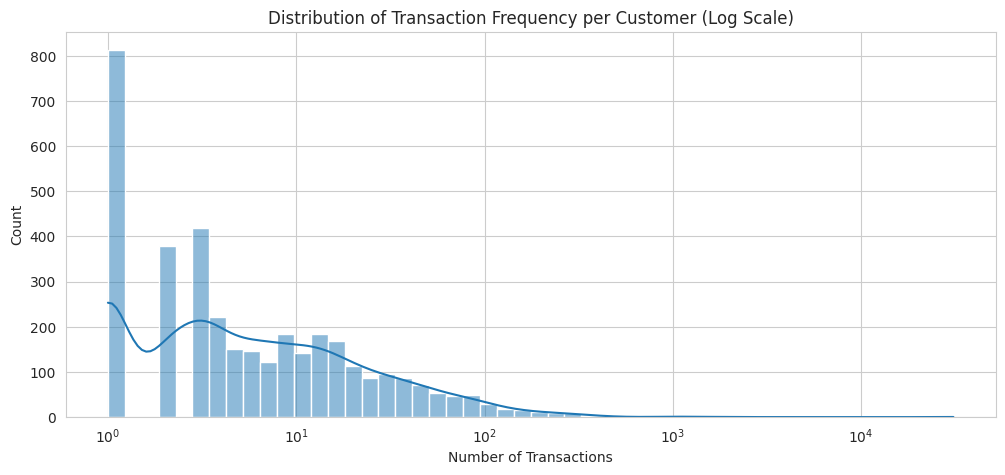

In [21]:
print(f"Total Transactions: {len(df)}")
print(f"Unique Customers (AccountId): {df['AccountId'].nunique()}")
print(f"Avg Transactions per Customer: {len(df) / df['AccountId'].nunique():.2f}")

# Visualize Transaction Frequency per Customer
customer_freq = df['AccountId'].value_counts()
plt.figure(figsize=(12, 5))
sns.histplot(customer_freq, bins=50, kde=True, log_scale=True)
plt.title('Distribution of Transaction Frequency per Customer (Log Scale)')
plt.xlabel('Number of Transactions')
plt.show()